## Getting the Data:

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import json
import matplotlib.pyplot as plt

## Build query:
url = 'https://api.eia.gov/v2/electricity/retail-sales/data/' 
api_key = '?api_key=YYz5xOSLjJP5ZbZ2sPbsNAuvBdEdEnSGhsEjkSFr'
query = '&frequency=monthly&data[0]=customers&data[1]=price&data[2]=revenue&data[3]=sales&facets[stateid][]=VA&start=2013-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

## Query the API:
response = urllib.request.urlopen(url+api_key+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close() 

## Convert results to dataframe:
df = pd.DataFrame.from_dict(data['response']['data'])
df.to_csv('electricity_data.csv')
print(df.shape)
df.head()

(726, 13)


,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-01,VA,Virginia,ALL,all sectors,4070280,11.76,1258.2641,10696.00511,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1,2023-01,VA,Virginia,TRA,transportation,1,12.21,1.81683,14.88526,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2,2023-01,VA,Virginia,RES,residential,3618436,14.03,630.32808,4491.90335,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3,2023-01,VA,Virginia,OTH,other,None,None,None,None,number of customers,cents per kilowatthour,million dollars,million kilowatthours
4,2023-01,VA,Virginia,IND,industrial,3675,9.39,126.31832,1344.93917,number of customers,cents per kilowatthour,million dollars,million kilowatthours


## EDA:

In [24]:
data['response']['description']

'Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales).  \r\n    Sources: Forms EIA-826, EIA-861, EIA-861M'

In [2]:
df.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-01,VA,Virginia,ALL,all sectors,4070280,11.76,1258.2641,10696.00511,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1,2023-01,VA,Virginia,TRA,transportation,1,12.21,1.81683,14.88526,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2,2023-01,VA,Virginia,RES,residential,3618436,14.03,630.32808,4491.90335,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3,2023-01,VA,Virginia,OTH,other,None,None,None,None,number of customers,cents per kilowatthour,million dollars,million kilowatthours
4,2023-01,VA,Virginia,IND,industrial,3675,9.39,126.31832,1344.93917,number of customers,cents per kilowatthour,million dollars,million kilowatthours


In [3]:
select = df['sectorName'] != 'other'
df = df.loc[ select,: ]

In [25]:
df['price']*df['sales'] # equals revenue: only use p and q, not p*q

0      125785.020094
1         181.749025
2       63021.404000
4       12628.978806
5       49992.941942
           ...      
720     86139.708963
721     30757.398628
722      8825.240673
724     46422.389690
725       151.800760
Length: 605, dtype: float64

In [4]:
df.columns

Index(['period', 'stateid', 'stateDescription', 'sectorid', 'sectorName',
       'customers', 'price', 'revenue', 'sales', 'customers-units',
       'price-units', 'revenue-units', 'sales-units'],
      dtype='object')

In [5]:
df['price'].unique()

array(['11.76', '12.21', '14.03', '9.39', '10.32', '11.55', '11.14',
       '13.81', '8.89', '10.25', '11.09', '12.33', '14.32', '8.79',
       '9.84', '11.22', '11.64', '14.41', '8.67', '10.3', '11.63',
       '10.86', '14.58', '8.56', '10.63', '11.68', '11.67', '14.14',
       '8.65', '10.6', '11.31', '10.7', '14.23', '8.36', '9.88', '10.66',
       '10.8', '13.32', '7.69', '9.58', '10.39', '9.75', '7.58', '12.82',
       '10.38', '9.76', '10.02', '12.66', '7.27', '8.87', '9.73', '10.65',
       '12.37', '7.12', '8.59', '10.2', '11.93', '7.2', '8.48', '9.85',
       '9.98', '11.97', '7', '8.57', '9.77', '10.15', '11.71', '7.82',
       '9.13', '10.17', '11.81', '6.67', '8.22', '9.31', '8.42', '6.97',
       '8.3', '9.41', '8.04', '6.94', '8.06', '8.15', '12.71', '6.68',
       '9.46', '8.19', '12.53', '6.41', '7.87', '8.1', '12.41', '6.13',
       '7.64', '8.49', '12.06', '6.11', '7.43', '8.08', '8.32', '5.47',
       '6.59', '9.06', '8.44', '7.75', '9.02', '11.24', '6.55', '7.48',
 

In [6]:
# Coerce text to numbers:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [7]:
df['period']

0      2023-01
1      2023-01
2      2023-01
4      2023-01
5      2023-01
        ...   
720    2013-01
721    2013-01
722    2013-01
724    2013-01
725    2013-01
Name: period, Length: 605, dtype: object

In [26]:
df['time'] = pd.to_datetime(df['period']) # Create time variable

In [42]:
temp = df['period'].to_list()
df['month'] = [ temp[j][5:7] for j in range(len(temp)) ]
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['month'].value_counts()

In [9]:
covid_marker = df['time'][220]

In [10]:
df['sectorName'].value_counts()

sectorName
all sectors       121
transportation    121
residential       121
industrial        121
commercial        121
Name: count, dtype: int64

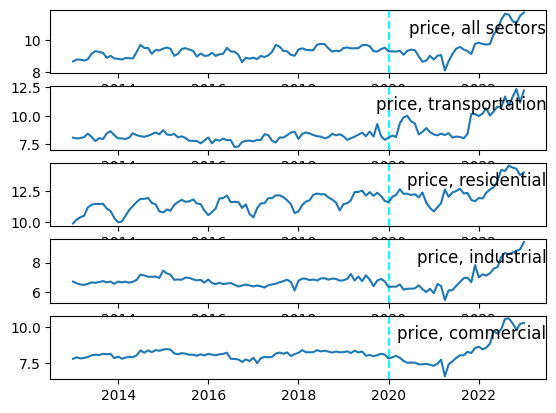

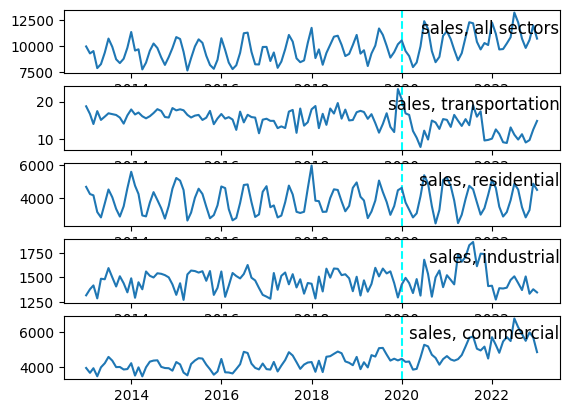

In [15]:
# Visualize time series:
sectors = df['sectorName'].unique().tolist()
vars = ['price', 'sales']
for var in vars:
    i = 1
    plt.figure()
    for sector in sectors:
        plt.subplot(len(sectors), 1, i)
        plt.axvline(x=covid_marker,color='cyan', linestyle='--')
        plt.plot( df.loc[ df['sectorName']==sector, 'time'], df.loc[ df['sectorName'] == sector, var] )
        plt.title(var+', '+sector, y=0.5, loc='right')
        i += 1
    plt.show()

## LSTM aNN:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Use (price,sales) across groups and month to predict the next (price',sales') for each group


## Design network:
model = Sequential()
model.add(LSTM(units = 50, input_shape=(train_X.shape[1], train_X.shape[2])))

# Output layer:
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train network:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 